In [87]:
import lightkurve as lk
tpf = lk.search_targetpixelfile("KIC 5731312", quarter=1).download()

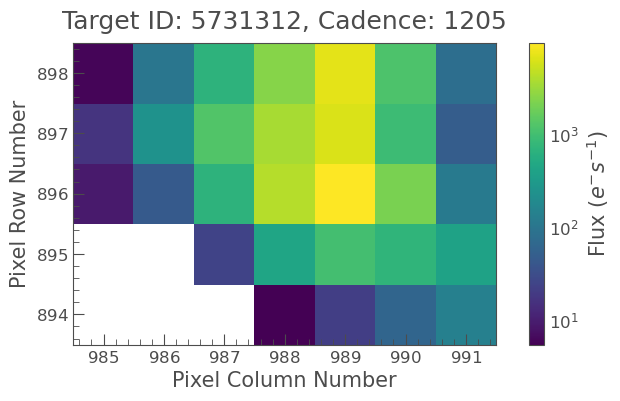

In [88]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [89]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

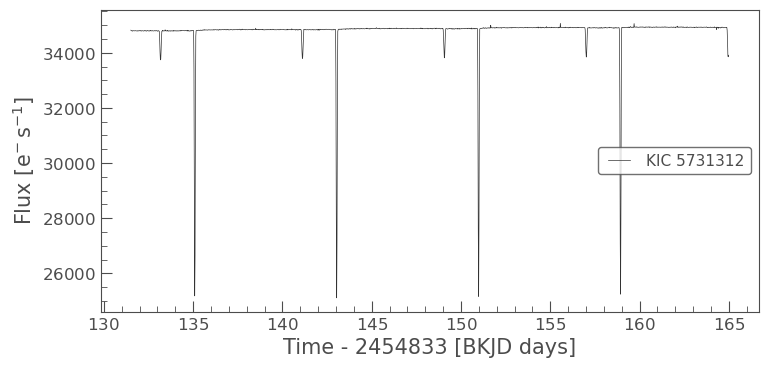

In [90]:
lc.plot();

In [91]:
flat, trend = lc.flatten(window_length=301, return_trend=True)

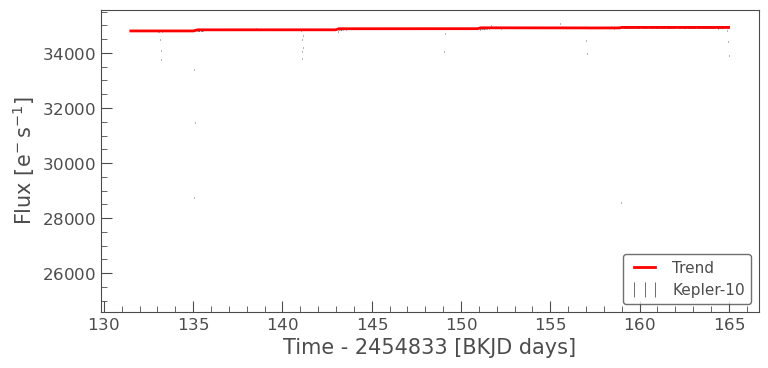

In [92]:
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

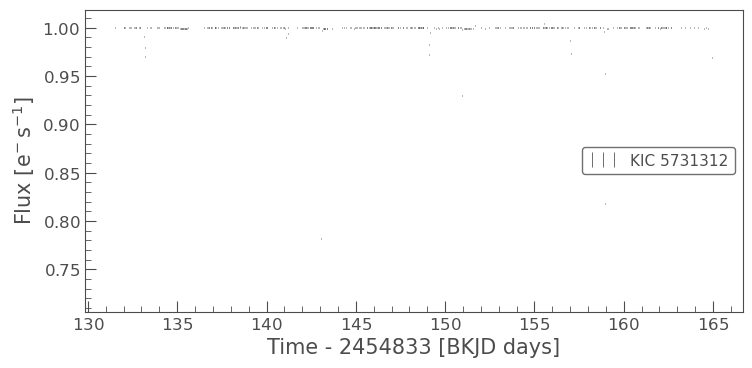

In [93]:
flat.errorbar(label="KIC 5731312");

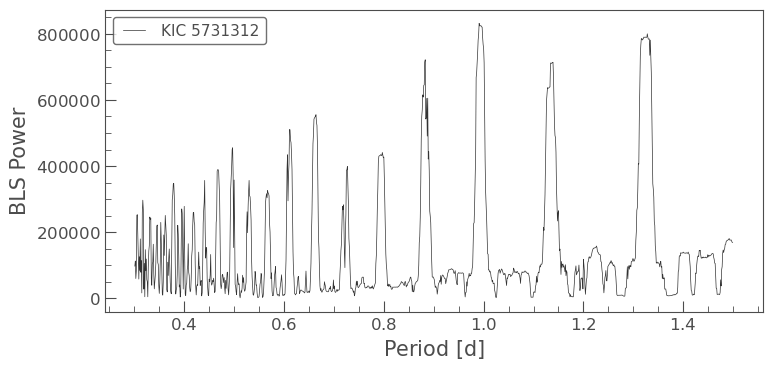

In [94]:
import numpy as np
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.3, 1.5, 0.001))
periodogram.plot();

In [95]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 0.991 d


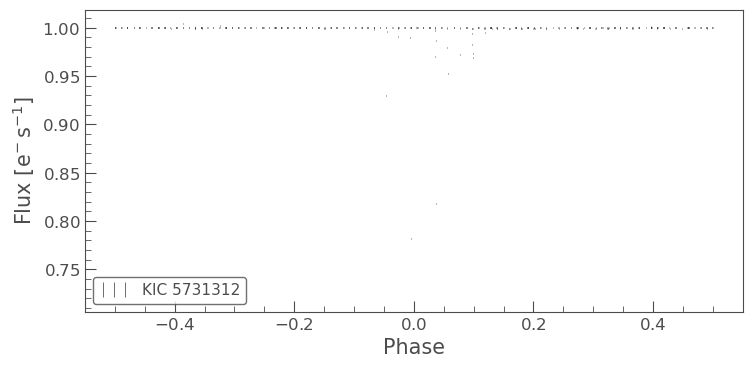

In [96]:
flat.fold(period=best_fit_period, t0=periodogram.transit_time_at_max_power).errorbar();

In [97]:
import stumpy

In [98]:
import pandas as pd

In [99]:
import math

In [100]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile("KIC 5731312", quarter=3).download()

In [101]:
print(lcf)

KeplerLightCurveFile(ID: 5731312)


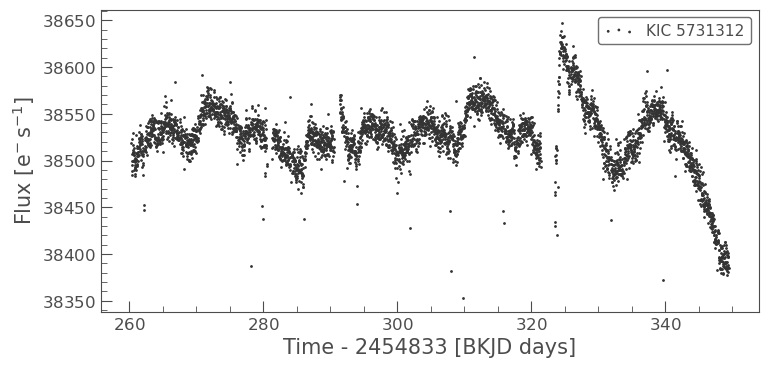

In [102]:
lc = lcf.PDCSAP_FLUX.remove_nans().remove_outliers() #pdc pipeline
lc.scatter();

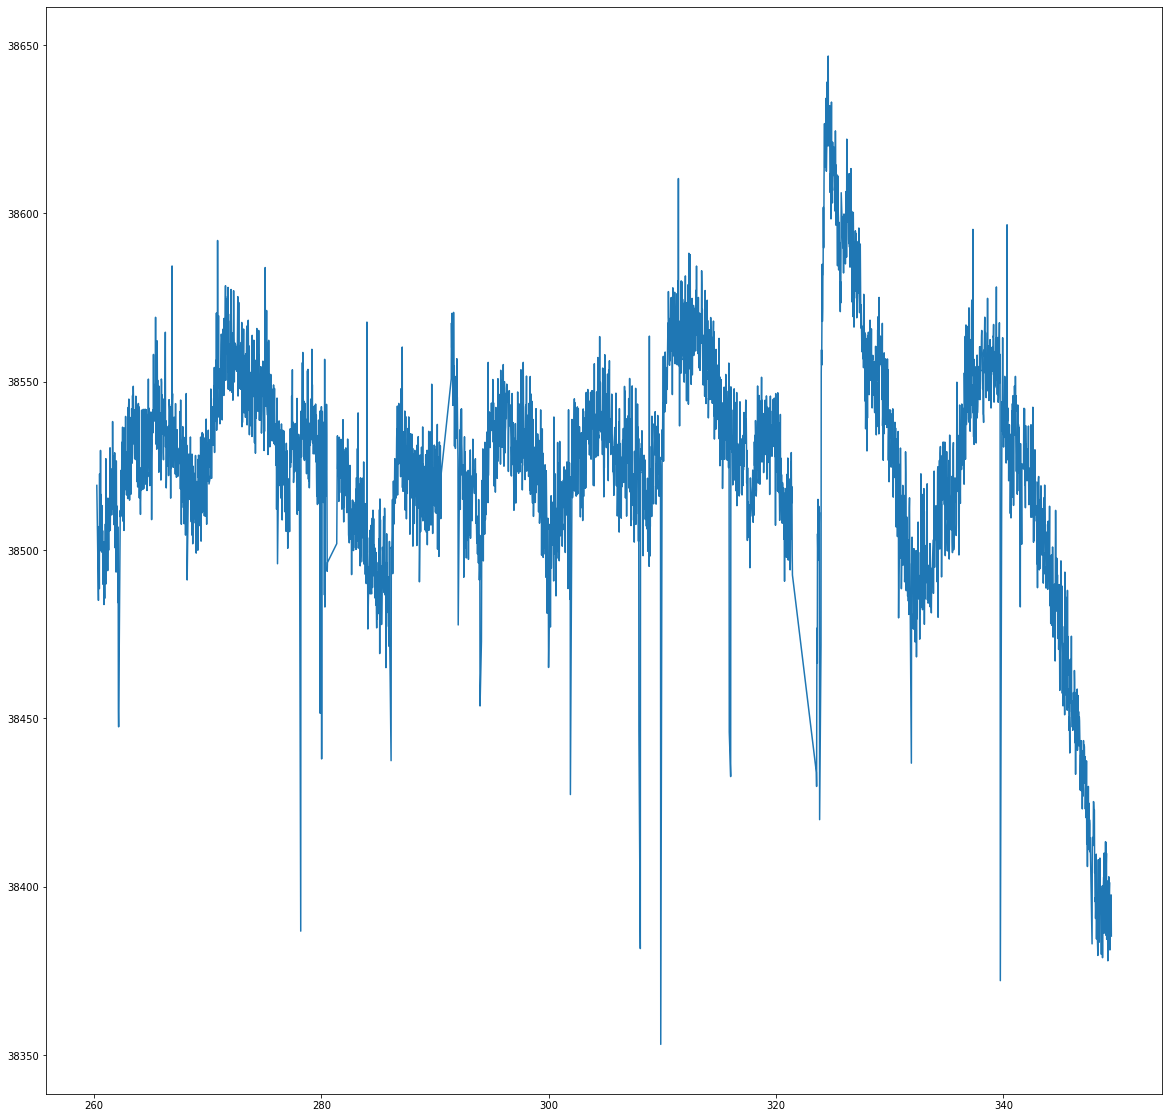

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(lc.time,lc.flux)

In [104]:
print(lc.flux)

[38519.2   38485.047 38506.96  ... 38396.977 38397.562 38385.32 ]


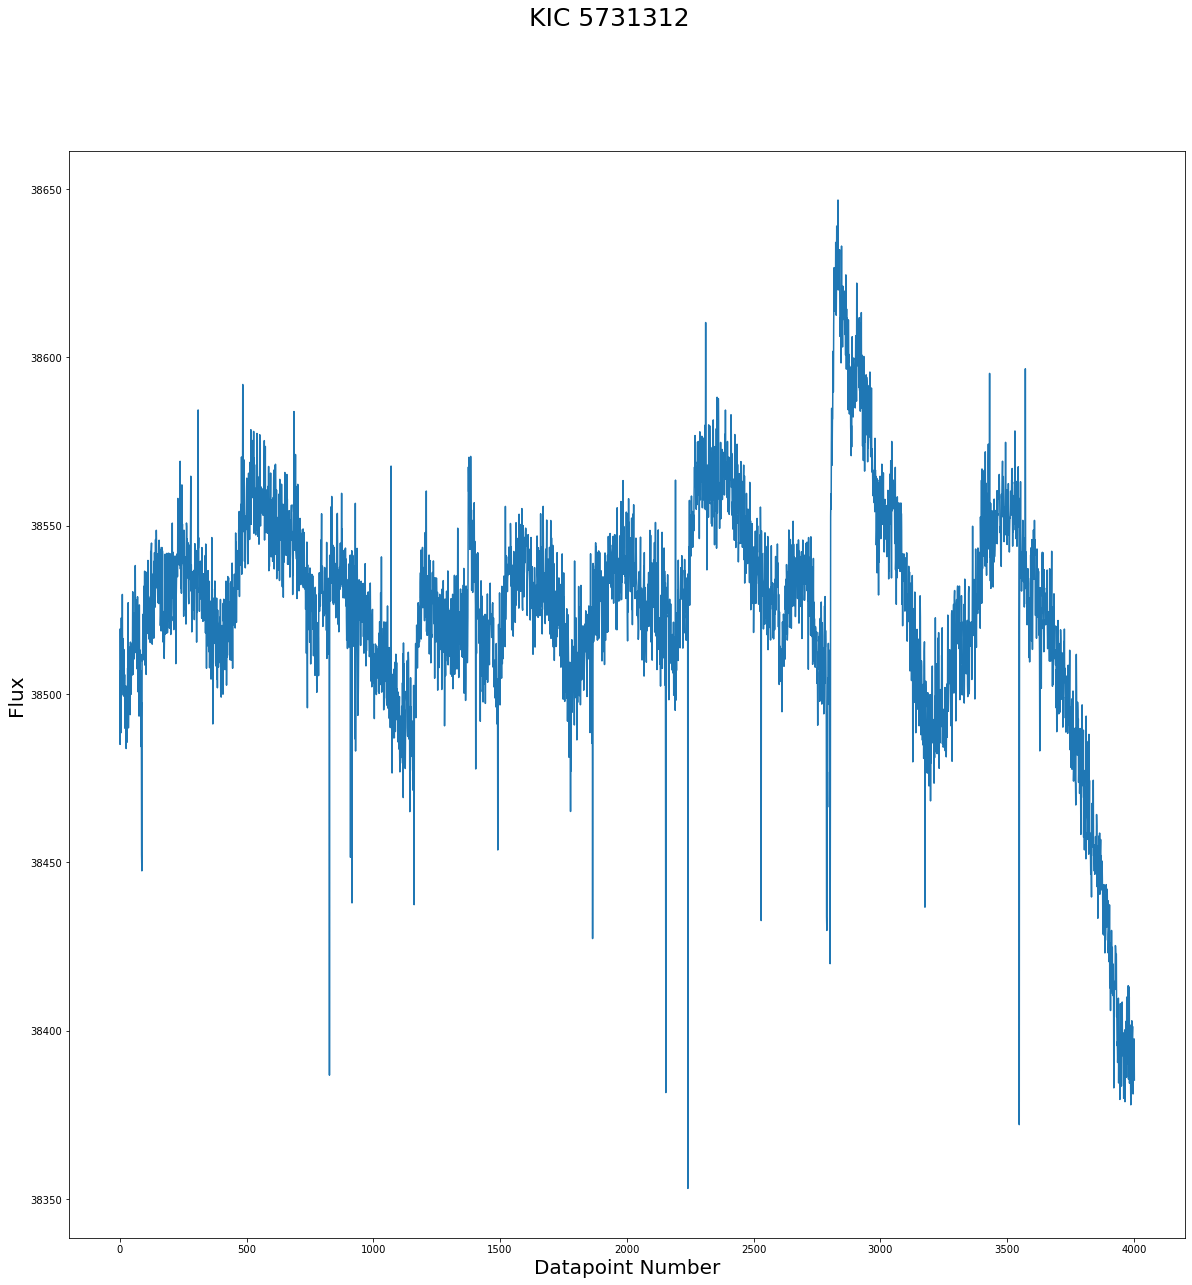

In [133]:
plt.figure(figsize=(20,20))
plt.suptitle('KIC 5731312', fontsize='25')
plt.xlabel('Datapoint Number', fontsize ='20')
plt.ylabel('Flux', fontsize='20')
plt.plot(lc.flux)

In [106]:
lc.flux

array([38519.2  , 38485.047, 38506.96 , ..., 38396.977, 38397.562,
       38385.32 ], dtype=float32)

In [107]:
import numpy as np

In [108]:
lc.time[1]-lc.time[0] #seperation in time between data points aka the cadence (0.02 days = 30 minutes)

0.1430310015930445

In [117]:
magic_num = 24
mp = stumpy.stump(np.array(lc.flux, dtype='float'), m=magic_num)
true_P = mp[:, 0]

In [118]:
mp[:, 0].max()

4.5928840178379176

In [119]:
np.argwhere(mp[:, 0] == mp[:, 0].max()).flatten()[0]

2441

In [120]:
mp

array([[4.176385991908406, 677, -1, 677],
       [4.048638876358992, 1369, -1, 1369],
       [4.147238946528603, 1457, -1, 1457],
       ...,
       [3.5068170417197195, 3013, 3013, -1],
       [3.6099175958083127, 3014, 3014, -1],
       [3.846315763535058, 2326, 2326, -1]], dtype=object)

In [121]:
lc.time.shape

(4003,)

In [122]:
mp.shape

(3980, 4)

(0.0, 3869.0)

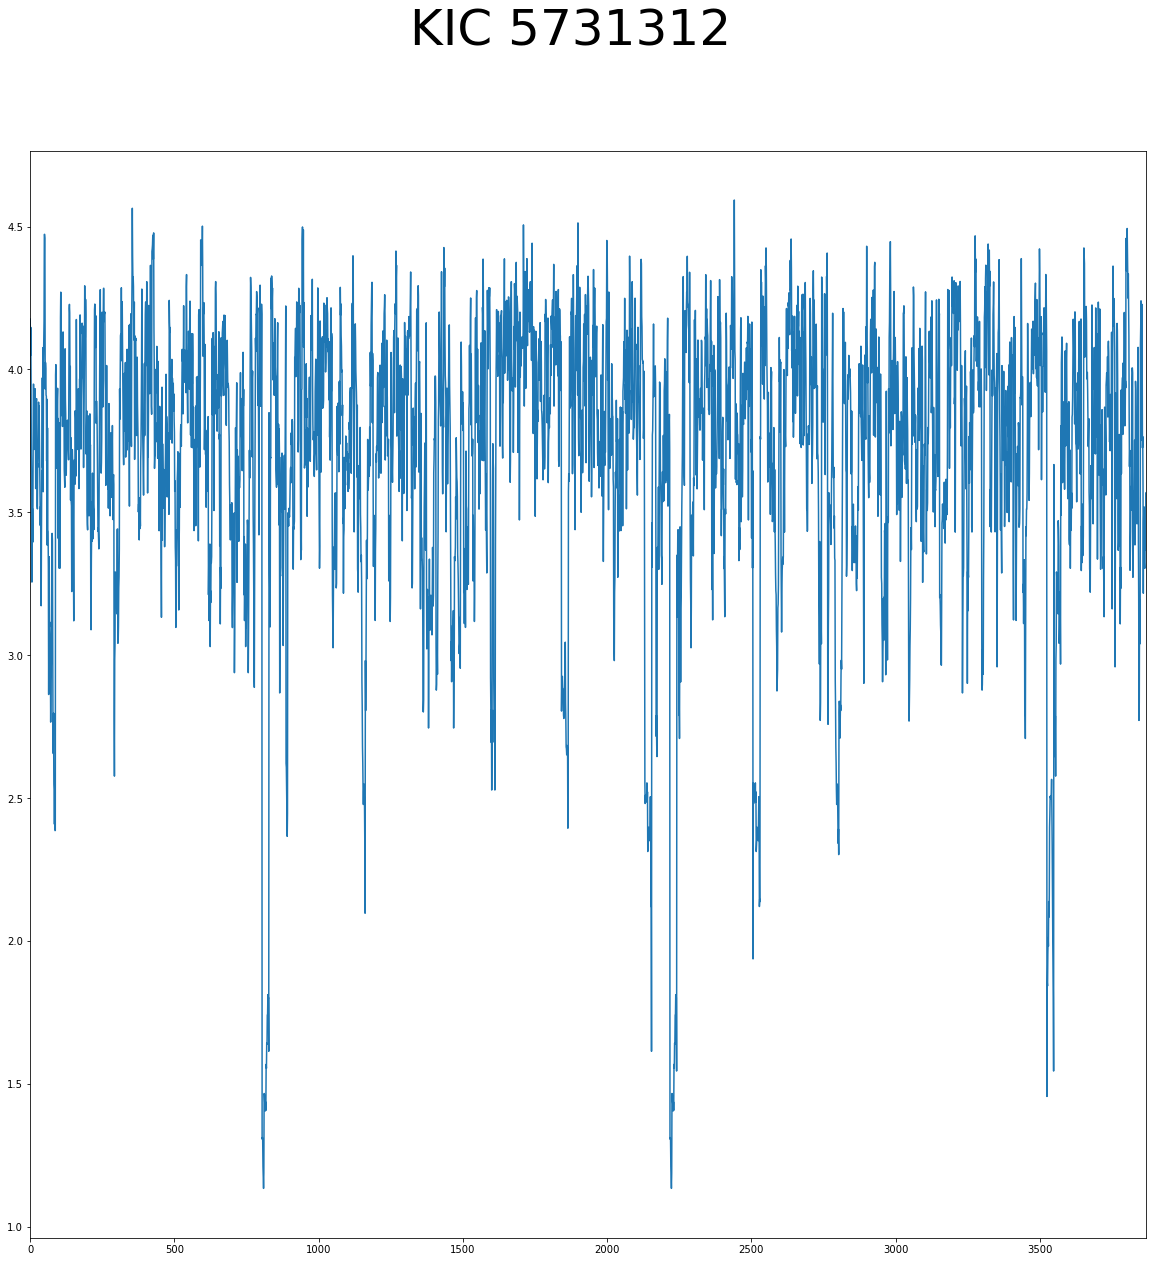

In [138]:
plt.figure(figsize=(20,20))
plt.plot(mp[:,0])
plt.suptitle('KIC 5731312', fontsize='50')
plt.xlabel('', fontsize ='20')
plt.ylabel('', fontsize='20')
plt.xlim(0,3869)